In [90]:
import ipywidgets as widgets
import datetime as dt
import pandas as pd
import numpy as np
import zarr
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 8]


In [ ]:
his_url="https://nx7384.your-storageshare.de/apps/sharingpath/wetwin/public/zunormm/ZUNO_his.zarr/"
his=xr.open_dataset(his_url,engine="zarr",consolidated=True)
his

In [ ]:
iloc=0
plt.plot(his.time[:],his.waterlevel[:,iloc])

## Map files

In [97]:
map_url="https://nx7384.your-storageshare.de/apps/sharingpath/wetwin/public/zunormm/ZUNO_map.zarr/"
#map_url="../Particles.jl/ZUNO_map.zarr"
map=xr.open_dataset(map_url,engine="zarr",consolidated=True)
#map

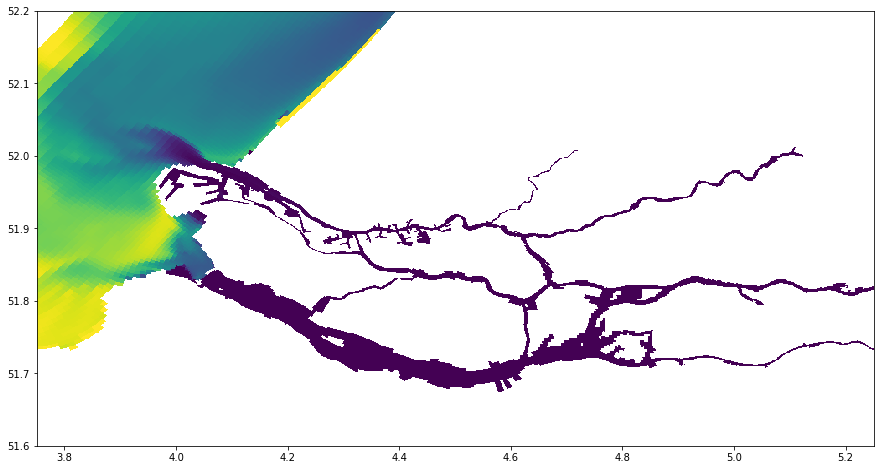

In [98]:
x=map["x_center"][:].values
y=map["y_center"][:].values
var=map["salinity"][12,:,:].values
var[var==0.0]=np.NaN
plt.pcolormesh(x,y,var)


array([[3.50000000e+01, 3.50000000e+01, 3.50000000e+01, ...,
        2.50850475e-45, 2.50850475e-45, 2.50850475e-45],
       [3.50000000e+01, 3.50000000e+01, 3.50000000e+01, ...,
        3.15715942e-46, 3.15715942e-46, 3.15715942e-46],
       [3.50000000e+01, 3.50000000e+01, 3.50000000e+01, ...,
        3.15715942e-46, 3.15715942e-46, 3.15715942e-46],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [35]:
help(plt.pcolormesh)

Help on function pcolormesh in module matplotlib.pyplot:

pcolormesh(*args, alpha=None, norm=None, cmap=None, vmin=None, vmax=None, shading=None, antialiased=False, data=None, **kwargs)
    Create a pseudocolor plot with a non-regular rectangular grid.
    
    Call signature::
    
        pcolormesh([X, Y,] C, **kwargs)
    
    *X* and *Y* can be used to specify the corners of the quadrilaterals.
    
    .. hint::
    
       `~.Axes.pcolormesh` is similar to `~.Axes.pcolor`. It is much faster
       and preferred in most cases. For a detailed discussion on the
       differences see :ref:`Differences between pcolor() and pcolormesh()
       <differences-pcolor-pcolormesh>`.
    
    Parameters
    ----------
    C : 2D array-like
        The color-mapped values.
    
    X, Y : array-like, optional
        The coordinates of the corners of quadrilaterals of a pcolormesh::
    
            (X[i+1, j], Y[i+1, j])       (X[i+1, j+1], Y[i+1, j+1])
                                  +--

## Zarr library

Above we're opening the dataset with Xarray. This is probably the recommended route in most cases, but you can also use the underlying zarr library directly.

In [ ]:
ff=zarr.open_consolidated(his_url) #consolidated metadata is necessary when no directories can be listed as over http 

print(ff.tree())


In [ ]:
print(ff.waterlevel.attrs.asdict())
ff.waterlevel.info

In [69]:
x=np.array([1,2,3])
y=np.array([1,2])
vals=np.random.randn(2,3)
#plt.pcolormesh(x,y,vals)
x.shape, y.shape, vals.shape

((3,), (2,), (2, 3))